In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [37]:
slaves_df = []

dir_path = r'gcp-results/'
for filename in os.listdir(dir_path):
    if filename.endswith(".csv"):
        print(dir_path + filename)
        df = pd.read_csv(dir_path + filename)
        slaves_df.append(df)

gcp-results/2019-02-05-metricbeat-5slaves.csv
gcp-results/2019-02-05-metricbeat-3slaves.csv
gcp-results/2019-02-05-metricbeat-4slaves.csv
gcp-results/2019-02-05-metricbeat-2slave.csv
gcp-results/2019-02-05-metricbeat-1slaves.csv
gcp-results/2019-02-05-metricbeat-6slaves.csv
gcp-results/2019-02-05-metricbeat-2slaves.csv
gcp-results/2019-02-05-metricbeat-7slaves.csv


In [47]:
total_data = pd.DataFrame(slaves_df[0]['Metric'])
total_data['Unit'] = slaves_df[0]['Unit']
cell_names = []

for i, slave in enumerate(slaves_df):
    cell_name = str(i) + "_slave"
    cell_names.append(cell_name)
    total_data[cell_name] = slaves_df[i]['Value']

total_data.head()

,Metric,Unit,0_slave,1_slave,2_slave,3_slave,4_slave,5_slave,6_slave,7_slave
0,Total Young Gen GC,s,0.00,0.00,0.00,2.94525,3.021633,0.00,3.044817,0.00
1,Total Old Gen GC,s,0.00,0.00,0.00,2.94525,3.021633,0.00,3.044817,0.00
2,Min Throughput,ops/s,0.00,0.00,0.00,2.94525,3.021633,0.00,3.044817,603.84
3,Median Throughput,ops/s,4742.96,2060.43,3113.08,2.94525,3.021633,1350.93,3.044817,3088.14
4,Max Throughput,ops/s,5483.24,2715.72,4775.75,0.00000,0.000000,1826.94,0.000000,3950.15


In [48]:
list_unit = total_data['Unit']
list_row = list(total_data['Metric'].unique())
list_row = list_row[:-1]
list_row

['Total Young Gen GC',
 'Total Old Gen GC',
 'Min Throughput',
 'Median Throughput',
 'Max Throughput',
 '50th percentile latency',
 '90th percentile latency',
 '99th percentile latency',
 '100th percentile latency',
 '50th percentile service time',
 '90th percentile service time',
 '99th percentile service time',
 '100th percentile service time']

In [68]:
name_to_index = {}
for i in range(len(list_row)):
    name_to_index[total_data['Metric'][i]] = i
    
def get_plot_data(index):
    return [float(total_data.iloc[index][str(i) + '_slave']) for i in range(7)]

[0.0, 0.0, 0.0, 2.94525, 3.0216333333333334, 0.0, 3.0448166666666667]
[0.0, 0.0, 0.0, 2.94525, 3.0216333333333334, 0.0, 3.0448166666666667]
[0.0, 0.0, 0.0, 2.94525, 3.0216333333333334, 0.0, 3.0448166666666667]
[4742.96, 2060.43, 3113.08, 2.94525, 3.0216333333333334, 1350.93, 3.0448166666666667]
[5483.24, 2715.72, 4775.75, 0.0, 0.0, 1826.94, 0.0]
[58.93252449459396, 58.16494749160484, 52.07617749692872, 0.0, 0.0, 53.889418501057655, 0.0]
[10987.836380893714, 17729.62642711646, 4163.633295180626, 0.0, 0.0, 23686.26813418814, 0.0]
[15125.216415468312, 36947.40775679704, 12491.995584886752, 0.0, 0.0, 52154.91066672518, 0.0]
[16585.052968992386, 40622.772355010966, 14077.131862984968, 0.05855, 0.05843333333333332, 57434.27813099697, 0.07830000000000001]
[58.93252449459396, 58.16494749160484, 52.07617749692872, 1.0, 1.0, 53.889418501057655, 1.0]
[10987.836380893714, 17729.62642711646, 4163.633295180626, 0.05855, 0.05843333333333332, 23686.26813418814, 0.07830000000000001]
[15125.216415468312

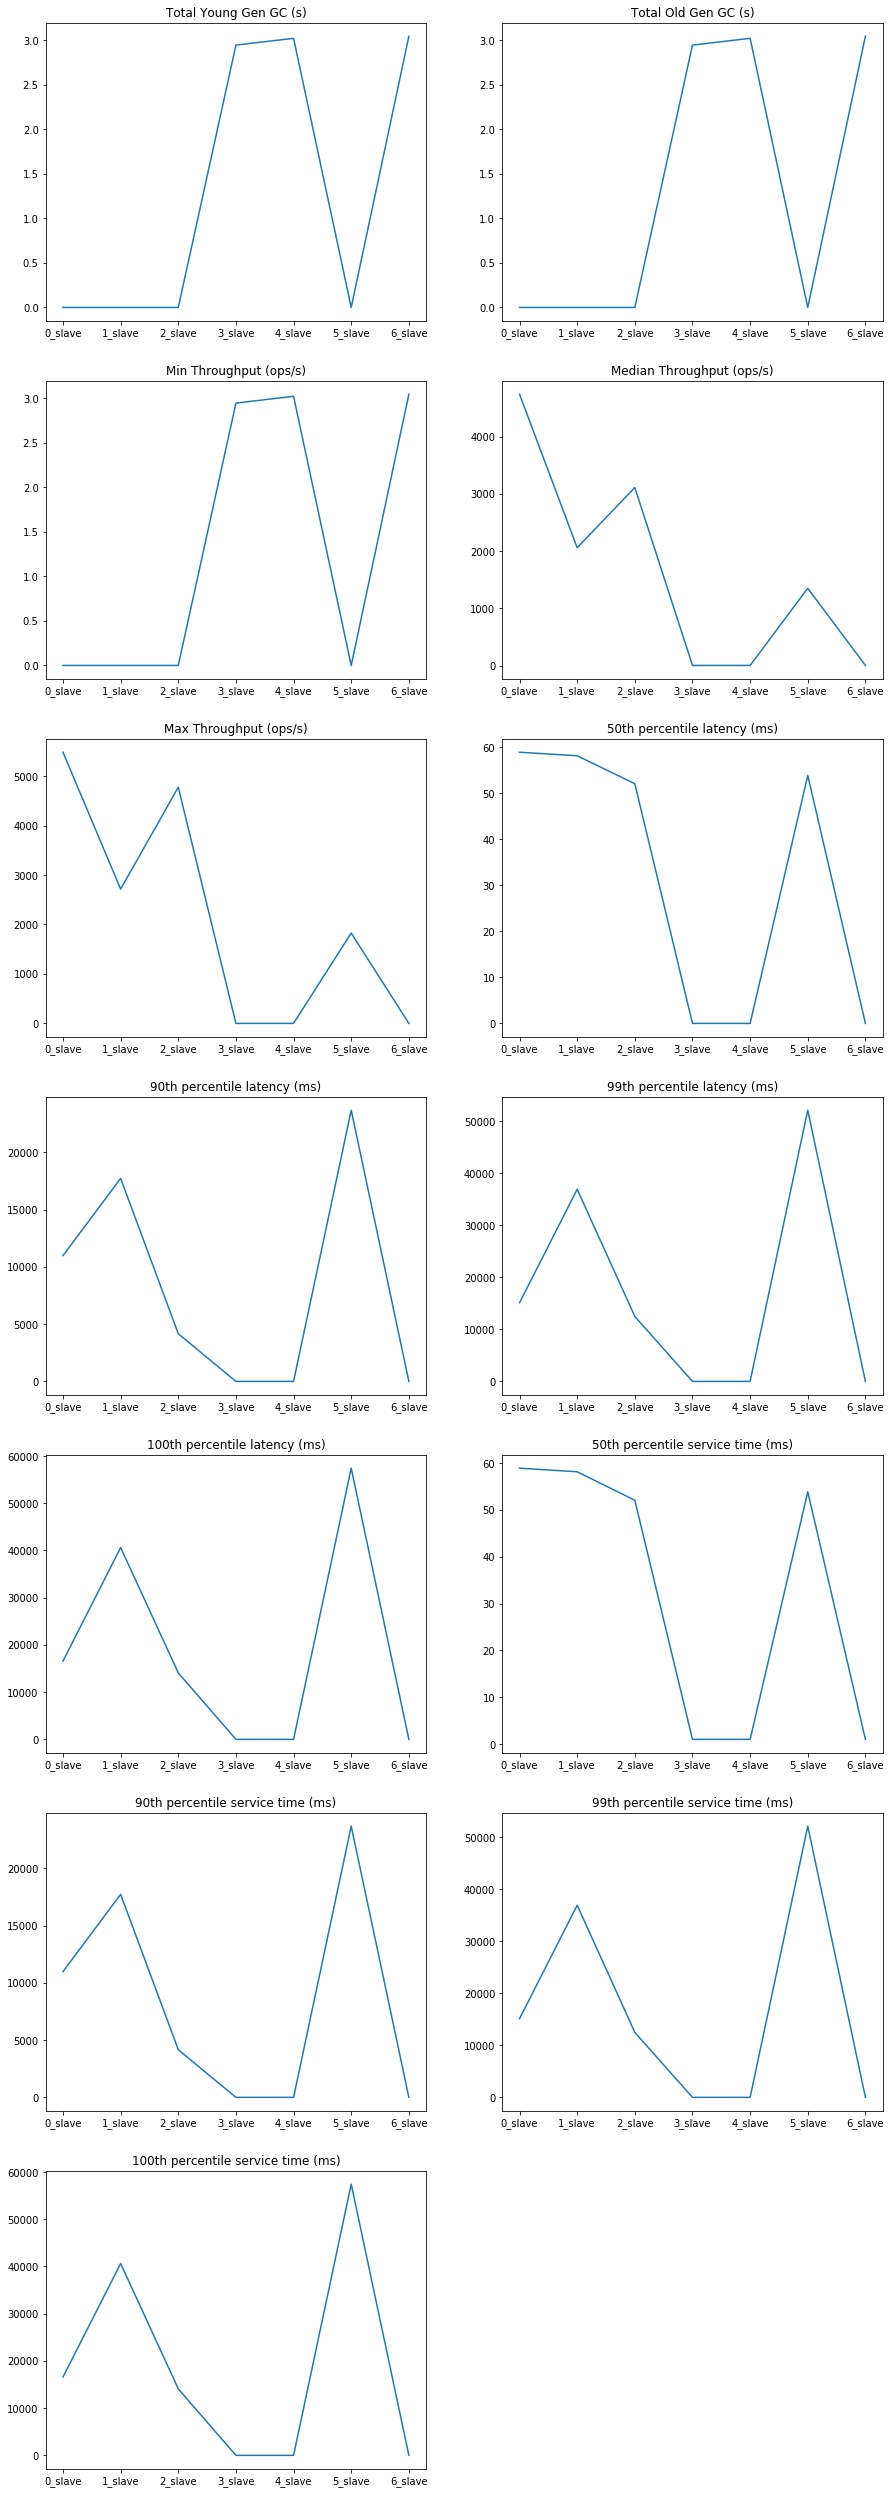

In [70]:
from matplotlib.ticker import FormatStrFormatter

plt.figure(figsize=[15,len(list_row)//2*7.5])
for i,row in enumerate(list_row):
    plt.subplot(len(list_row)//2+1,2,i+1)
    plt.xticks([0,1,2,3,4,5,6], cell_names)
    plt.title(row + ' ('+ str(list_unit[name_to_index[row]])+')')
#     print(get_plot_data(name_to_index[row]))
    plt.plot(get_plot_data(name_to_index[row]))